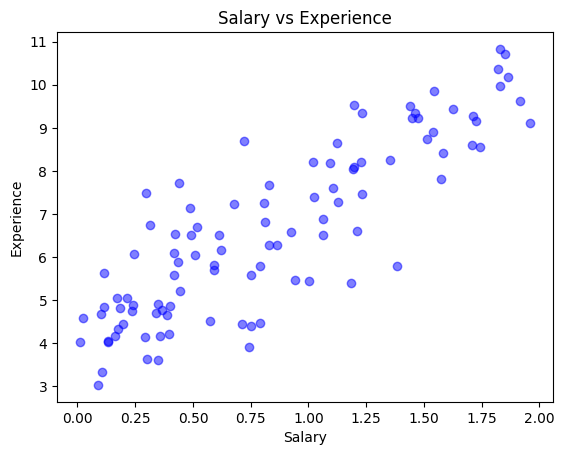

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X= 2*np.random.rand(100,1)
y= 4+3*X+np.random.randn(100,1) # salary formula with noise

plt.scatter(X,y, color='blue', marker='o', label='Data points', alpha=0.5)
plt.xlabel("Salary")
plt.ylabel("Experience")
plt.title("Salary vs Experience")
plt.show()



In [4]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000): 
    m, b= 0, 0 # initial parameters weights and bias
    n=len(y) # number of data points
    history= [] # to store the cost at each epoch

    for epoch in range(epochs):
        indices=np.random.permutation(n)# shuffle data points
        X_shuffled, y_shuffled=X[indices], y[indices] # shuffled data
        
        for i in range(n):
            xi= X_shuffled[i]
            yi= y_shuffled[i]

            prediction=m*xi + b # prediction for single point

            m_gradient= -2 * xi * (yi - prediction) # gradient w.r.t m
            b_gradient= -2 * (yi - prediction) # gradient w.r.t b

            m -= learning_rate * m_gradient # update m
            b -= learning_rate * b_gradient # update b

        current_loss= np.mean((y-(m*X+b))**2) # compute loss
        history.append(current_loss) # store loss
    return m, b, history
m_final, b_final, loss_history= stochastic_gradient_descent(X,y, learning_rate=0.01, epochs=50)
print(f"Final parameters: m = {m_final}, b = {b_final}") 




    


Final parameters: m = [3.08356017], b = [4.10383333]


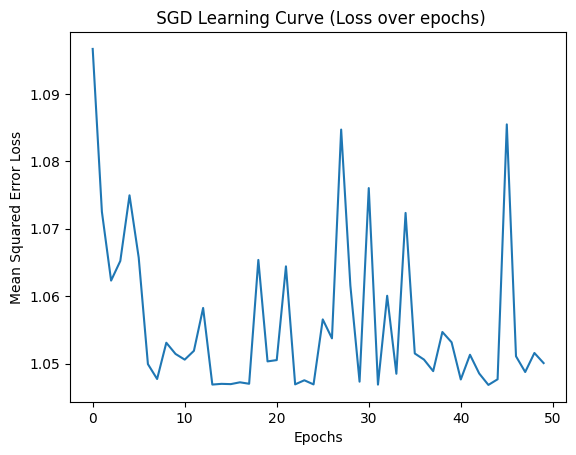

In [5]:
plt.plot(loss_history)
plt.title(" SGD Learning Curve (Loss over epochs)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.show()



C:\Users\HM Traders\AppData\Local\Temp\ipykernel_19164\2933958877.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m_path.append(float(m_curr))
C:\Users\HM Traders\AppData\Local\Temp\ipykernel_19164\2933958877.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_path.append(float(b_curr))


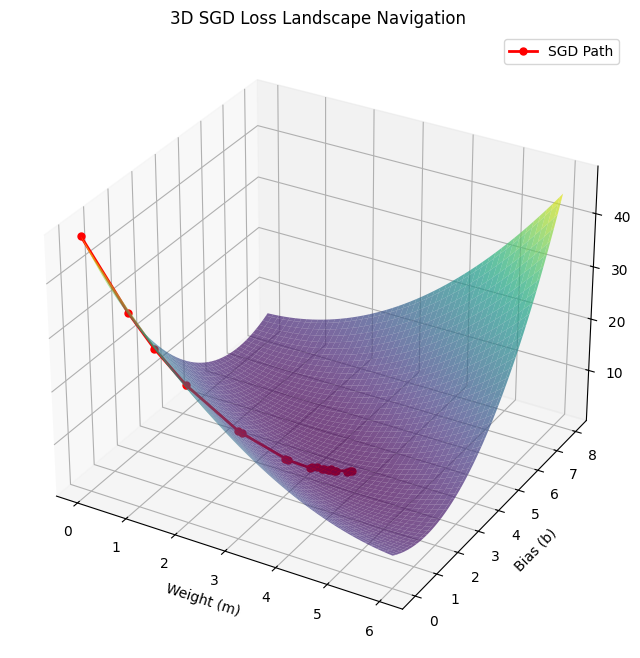

In [ ]:
from  mpl_toolkits.mplot3d import axis3d

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# creating a grid of m and b values
m_range = np.linspace(0, 6, 100)
b_range = np.linspace(0, 8, 100)
M, B = np.meshgrid(m_range, b_range)

# calculating loss (MSE) for every point on the grid
# Loss = mean((y - (m*X + b))^2) 
Z = np.array([np.mean((y - (mi * X + bi))**2) for mi, bi in zip(np.ravel(M), np.ravel(B))])
Z = Z.reshape(M.shape)

# creating the 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# plot the surface
surf = ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.7)

# run a quick SGD to capture the 'path'
m_path, b_path, z_path = [0.0], [0.0], [np.mean((y - (0.0*X + 0.0))**2)]
m_curr, b_curr = 0.0, 0.0
lr = 0.05

for i in range(20): # just 20 steps to keep the plot clean
    idx = np.random.randint(len(y))
    xi, yi = X[idx], y[idx]
    
    # calculate gradients
    m_grad = -2 * xi * (yi - (m_curr * xi + b_curr))
    b_grad = -2 * (yi - (m_curr * xi + b_curr))
    
    # update
    m_curr -= lr * m_grad
    b_curr -= lr * b_grad
    
    # record for plotting
    m_path.append(float(m_curr))
    b_path.append(float(b_curr))
    z_path.append(np.mean((y - (m_curr * X + b_curr))**2))

# overlay the path on the 3D surface
ax.plot(m_path, b_path, z_path, color='red', marker='o', markersize=5, label='SGD Path', linewidth=2)

ax.set_xlabel('Weight (m)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('3D SGD Loss Landscape Navigation')
plt.legend()
plt.show()

